# Exercise 2: Sinusoids and the DFT

Doing this exercise you will get a better understanding of the basic elements and operations that take place in the Discrete Fourier Transform (DFT). There are five parts: 1) Generate a sinusoid, 2) Generate a complex sinusoid, 3) Implement the DFT, 4) Implement the IDFT, and 5) Compute the magnitude spectrum of an input sequence.

### Relevant Concepts

A real sinusoid in discrete time domain can be expressed by:

\begin{equation}
x[n] = A\cos(2 \pi fnT + \varphi)
\end{equation}

where, $x$ is the array of real values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $f$ is the frequency value of the sinusoid in Hz, $T$ is the sampling period equal to $1/fs$, fs is the sampling frequency in Hz, and $\varphi$ is the initial phase of the sinusoid in radians.

A complex sinusoid in discrete time domain can be expressed by:

\begin{equation}
\bar{x}[n] = Ae^{j(\omega nT + \varphi)} = A\cos(\omega nT + \varphi)+ j A\sin(\omega nT + \varphi)
\end{equation}

where, $\bar{x}$ is the array of complex values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $e$ is the complex exponential number, $\omega$ is the frequency of the sinusoid in radians per second (equal to $2 \pi f$), $T$ is the sampling period equal $1/fs$, fs is the sampling frequency in Hz and $\varphi$ is the initial phase of the sinusoid in radians.

The $N$ point DFT of a sequence of real values $x$ (a sound) can be expressed by:

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n]e^{-j2 \pi kn/N}  \hspace{1cm} k=0,...,N-1
\end{equation}

where $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the DFT.

The IDFT of a spectrum $X$ of length $N$ can be expressed by:

\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]e^{j2 \pi kn/N}  \hspace{1cm} n=0,...,N-1
\end{equation}

where, $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the spectrum $X$.

The magnitude of a complex spectrum $X$ is obtained by taking its absolute value: $|X[k]| $


In [1]:
import numpy as np

## Part 1 - Generate a sinusoid

Complete the function `gen_sine()` to generate a real sinusoid (use `np.cos()`) given its amplitude `A`, frequency `f` (Hz), initial phase `phi` (radians), sampling rate `fs` (Hz) and duration `t` (seconds). 

All the input arguments to this function `(A, f, phi, fs and t)` are real numbers such that `A`, `t` and `fs` are positive, and `fs > 2*f` to avoid aliasing. The function should return a numpy array `x` of the generated sinusoid. 

Use the function `cos` of the numpy package to compute the sinusoidal values.

In [2]:
# E2 - 1.1: Complete function

def gen_sine(A, f, phi, fs, t):
    """Generate a real sinusoid given its amplitude, frequency, initial phase, sampling rate, and duration.
    
    Args:
        A (float):  amplitude of the sinusoid
        f (float): frequency of the sinusoid in Hz
        phi (float): initial phase of the sinusoid in radians
        fs (float): sampling frequency of the sinusoid in Hz
        t (float): duration of the sinusoid (is second)
        
    Returns:
        np.array: array containing generated sinusoid
        
    """
    ### your code here
    if fs < 2*f or t < 0 or fs < 0 or A < 0:
        return "Some of the coefficients doesn't follow the rules."

    t = np.arange(0, t, 1/fs)
    sine = np.zeros(len(t))
    sine = A*np.cos(2*np.pi*f*t + phi)
    
    return sine

Now call and test the `gen_sine()` function. If you use `A=1.0, f = 10.0, phi = 1.0, fs = 50` and `t = 0.1`, the output numpy array should be:

```
array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])
```

To generate a sinewave that you can hear, it should be longer and with a higher sampling rate. For example you can use `A=1.0, f = 440.0, phi = 1.0, fs = 5000` and `t = 0.5`. To play it import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=x, rate=fs))`.

In [3]:
# Generating the first signal (test):
A = 1
f = 10
phi = 1
fs = 50
t = 0.1
test = gen_sine(A,f,phi,fs,t)

print("Atributs: Amplitute", A,", Freq", f, ", Phase", phi, ", Sampling Freq", fs, ", Duration", t)
print("Sinewave obtained: ", test)

Atributs: Amplitute 1 , Freq 10 , Phase 1 , Sampling Freq 50 , Duration 0.1
Sinewave obtained:  [ 0.54030231 -0.63332387 -0.93171798  0.05749049  0.96724906]


In [18]:
# E2 - 1.2: Call the function gen_sine() with the values proposed above, plot and play the output sinusoid

import IPython.display as ipd
import matplotlib.pyplot as plt

### your code here
A = 1
f = 440
phi = 1
fs = 5000
t = 0.5
x = gen_sine(A,f,phi,fs,t)

print("Atributs: Amplitute", A,", Freq", f, ", Phase", phi, ", Sampling Freq", fs, ", Duration", t)
print("Sinewave obtained: ", x)
ipd.display(ipd.Audio(data=x, rate=fs))

Atributs: Amplitute 1 , Freq 440 , Phase 1 , Sampling Freq 5000 , Duration 0.5
Sinewave obtained:  [ 0.54030231  0.01787507 -0.50987914 ...  0.79075133  0.99440411
  0.90171349]


## Part 2 - Generate a complex sinusoid 

Complete the `gen_complex_sine()` function to generate the complex sinusoid that is used in DFT computation of length `N` (samples), corresponding to the frequency index `k`. Note that the complex sinusoid used in DFT computation has a negative sign in the exponential function.

The amplitude of such a complex sinusoid is `1`, the length is `N`, and the frequency in radians is `2*pi*k/N`.

The input arguments to the function are two positive integers, `k` and `N`, such that `k < N-1`. The function should return `c_sine`, a numpy array of the complex sinusoid. Use the function `exp()` of the numpy package to compute the complex sinusoidal values.

In [19]:
# E2 - 2.2: Complete function

def gen_complex_sine(k, N):
    """Generate one of the complex sinusoids used in the DFT from its frequency index and the DFT lenght.
    
    Args:
        k (integer): frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid, DFT length, in samples
        
    Returns:
        np.array: array with generated complex sinusoid (length N)
        
    """
    ### your code here
    #if k < (N-1) or k < 0 or N < 0:
    #    return "Arguments bad specified"

    n = np.arange(N)
    #c_sine = np.cos(2*np.pi*n*(k/N)) - 1j*np.sin(2*np.pi*n*(k/N))
    c_sine = np.exp(-1j*2*np.pi*n*(k/N))
    
    return c_sine  

Now run an test the `gen_complex_sine()` function. If you run it using `k=1` and `N=5`, the function should return the following numpy array:

```
array([ 1.0 + 0.j,  0.30901699 - 0.95105652j, -0.80901699 - 0.58778525j, -0.80901699 + 0.58778525j, 0.30901699 + 0.95105652j])
```

[ 1.        +0.j          0.30901699-0.95105652j -0.80901699-0.58778525j
 -0.80901699+0.58778525j  0.30901699+0.95105652j]


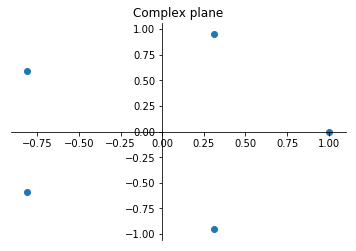

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


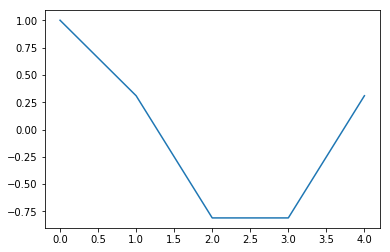

In [45]:
# E2 - 2.2: Call gen_complex_sine() with the values suggested above and plot the real and imaginary parts of the 
# output complex sinusoid

### your code here
y = gen_complex_sine(1,5)
print(y)

X = [x.real for x in cnums]
Y = [x.imag for x in cnums]


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Complex plane')
ax.scatter(X,Y)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.show()


plt.plot(y)
plt.show()

## Part 3 - Implement the discrete Fourier transform (DFT)

Complete the function `dft()` to implement the discrete Fourier transform (DFT) equation given above. Given a sequence `x` of length `N`, the function should return its spectrum of length `N` with the frequency indexes ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array `X`, the DFT of `x`.

In [28]:
# E2 - 3.1: Complete function

def dft(x):
    """Compute the DFT of a signal.
    
    Args:
        x (numpy array): input sequence of length N
        
    Returns:
        np.array: N point DFT of the input sequence x
    """
    ## Your code here
    N = len(x)
    sm = 0
    aux = np.arange(N)*1j
    
    for k in range(N):
        for n in range(N):
            sm += x[n]*np.exp((-1j * 2 * np.pi * k * n) / N)
        aux[k] = sm
        sm = 0
    return aux


Now run and test the function `dft()`. If you run it using as input `x = np.array([1, 2, 3, 4])`, the function shoulds return the following numpy array:

```
array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])
```

Note that you might not get an exact 0 in the output because of the small numerical errors due to the limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending on your machine.

In [29]:
# E2 - 3.2: Call dft() with the values suggested above and plot the real and imaginary parts of output spectrum
x = np.array([1,2,3,4])
print(dft(x))
### your code hereprint(dft(x))

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


## Part 4 - Implement the inverse discrete Fourier transform (IDFT)

Complete the function `idft()` to implement the inverse discrete Fourier transform (IDFT) equation given above. Given a frequency spectrum `X` of length `N`, the function should return its IDFT `x`, also of length `N`. Assume that the frequency index of the input spectrum ranges from 0 to `N-1`.

The input argument to the function is a numpy array `X` of the frequency spectrum and the function should return a numpy array of the IDFT of `X`.

Remember to scale the output appropriately.

In [34]:
# E2 - 4.1: Complete function

def idft(X):
    """Compute the inverse-DFT of a spectrum.
    
    Args:
        X (np.array): frequency spectrum (length N)
        
    Returns:
        np.array: N point IDFT of the frequency spectrum X
        
    """
  ## Your code here
    N = len(X)
    sm = 0
    aux = np.arange(N)*1j
    
    for k in range(N):
        for n in range(N):
            sm += X[n]*np.exp((1j * 2 * np.pi * k * n) / N)
        aux[k] = sm/N
        sm = 0
    return aux


Now run and test the `idft()` function. If you run it with the input `X = np.array([1, 1, 1, 1])`, the function should return the following numpy array: 

```
array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,   0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])
```

Notice that the output numpy array is essentially `[1, 0, 0, 0]`. Instead of exact 0 we get very small numerical values of the order of 1e-15, which can be ignored. Also, these small numerical errors are machine dependent and might be different in your case.

In addition, an interesting test of the IDFT function can be done by providing the output of the DFT of a sequence as the input to the IDFT. See if you get back the original time domain sequence.

In [35]:
# E2 - 4.2: Plot input spectrum (real and imaginary parts) suggested above, call idft(), and plot output signal 
# (real and imaginary parts)

### Your code here
X = np.array([1,1,1,1])
x = idft(X)
print(x)

[ 1.00000000e+00+0.00000000e+00j -4.59242550e-17+5.55111512e-17j
  0.00000000e+00+6.12323400e-17j  8.22616137e-17+8.32667268e-17j]


## Part 5 - Compute the magnitude spectrum

Complete the function `gen_mag_spectrum()` to compute the magnitude spectrum of an input sequence `x` of length `N`. The function should return an `N` point magnitude spectrum with frequency index ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array of the magnitude spectrum of `x`.

In [42]:
# E2 - 5.1: Complete function

def gen_mag_spec(x):
    """Compute magnitude spectrum of a signal.
    
    Args:
        x (np.array): input sequence of length N
        
    Returns:
        np.array: magnitude spectrum of the input sequence x (length N)
        
    """
    ### your code here
    N = len(x)
    mag = np.arange(N)
    mag = abs(dft(x))
    
    return mag

Now run and test the function `gen_mag_spec()`. If you run `gen_mag_spec()` using as input `x = np.array([1, 2, 3, 4])`, it should return the following numpy array:
```
array([10.0, 2.82842712, 2.0, 2.82842712])
```
For a more realistic use of `gen_mag_spec()` use as input a longer signal, such as `x = np.cos(2*np.pi*200.0*np.arange(512)/1000)`, and to get a visual representation of the input and output, import the `matplotlib.pyplot` package and use `plt.plot(x)` and `plt.plot(abs(X))`.

In [124]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import sys
import os

x = np.array([1,2,3,4])
print("Magnitute of the DFT of", x, ":", gen_mag_spec(x))

Magnitute of the DFT of [1 2 3 4] : [10.          2.82842712  2.          2.82842712]


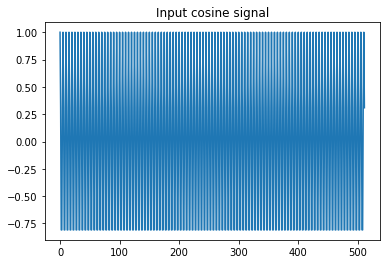

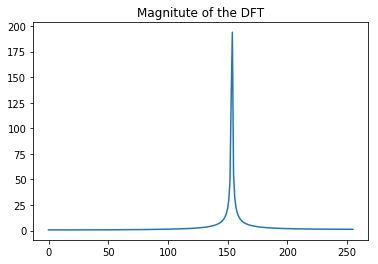

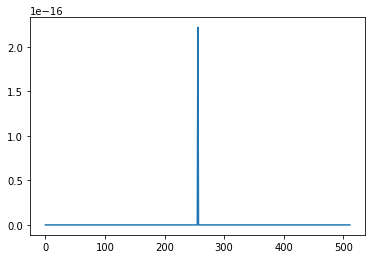

In [137]:
# E2 - 5.2: Plot input cosine signal suggested above, call gen_mag_spec(), and plot the output result

sys.path.append('../software/models/')
from dftModel import dftModel, dftAnal, dftSynth

### Your code here
x = (np.cos(2*np.pi*200*np.arange(512)/1000))
mag = gen_mag_spec(x)
mag_real = mag[int(len(mag)/2):int(len(mag))]

plt.plot(x)
plt.title("Input cosine signal")
plt.show()

plt.plot(mag_real)
plt.title("Magnitute of the DFT")
plt.show()

y = dftModel(x,np.zeros(512),1024)
plt.plot(y)
plt.show()